In [1]:
from data_utility import loadMNIST, MNIST_dict, vectorization, read_ModelNet_file
from raysense import generate_signature, randomray
import numpy as np
import matplotlib.pyplot as plt

## ModelNet Example

In [2]:
pointset, cls, class_name = read_ModelNet_file(index=1)
print(f"class label: {cls}")


class label: 0


### Sampling Point Clouds

Text(0.5, 0.92, 'airplane')

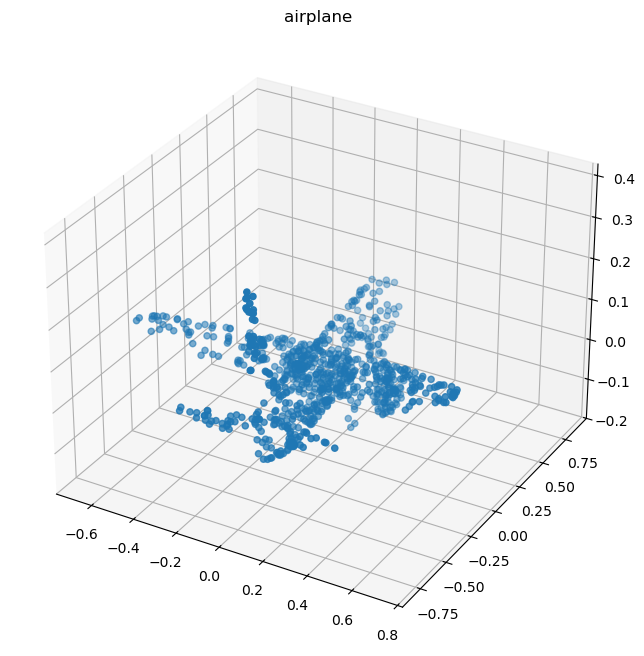

In [3]:
m = 256  # number of rays
k = 64  # number of points along a ray
num_neighbor = 5  # number of nearest neighbors to be found

d = pointset.shape[1]
smatrix, salient_pts, freq = generate_signature(m, k, d, pointset=pointset, num_neighbor=num_neighbor, add_cp=True, add_cpv=False, count_freq=True)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(salient_pts[:,0], salient_pts[:,1], salient_pts[:,2])
# ax.scatter(pointset[:,0], pointset[:,1], pointset[:,2])
plt.title(f'{class_name[cls]}')

## MNIST Example

### Load data (path to the folder containing the t10k MNIST file)

In [3]:
folder_path = " " # MNIST folder path
trainingImages, trainingLabels = loadMNIST( "train", folder_path )
testImages, testLabels = loadMNIST( "t10k", folder_path )

ImageDict_training = MNIST_dict(trainingImages, trainingLabels)
ImageDict_test = MNIST_dict(testImages, testLabels)

VectorDict_train = {}
VectorDict_test = {}
for digit in range(10):
    #get the corresponding digit image
    current_image_train = ImageDict_training.get(digit)
    current_image_test = ImageDict_test.get(digit)
    VectorDict_train[digit] = vectorization(current_image_train)
    VectorDict_test[digit] = vectorization(current_image_test)
# vectorize the whole data set
VectorSet_train = vectorization(trainingImages)
VectorSet_test = vectorization(testImages)

### RaySense to detect MNIST salient points

In [4]:
m = 256  # number of rays
k = 64  # number of points along a ray
num_neighbor = 1  # number of nearest neighbors to be found
Freq_Dict = {}
SalientPt_Dict = {}

for i in range(10):
    pointset = np.ndarray.copy(VectorDict_train[i].transpose())
    # pointset /= np.max(np.linalg.norm(pointset, axis = 1)) # normalized to a 2 ball
    pointset /= (2550*5)
    center = np.mean(pointset, axis=0)
    pointset -= center
    d = pointset.shape[1]
    _, salient_pts, freq = generate_signature(m, k, d, pointset=pointset, num_neighbor=num_neighbor, add_cp=True, add_cpv=False, count_freq=True)
    Freq_Dict[i] = freq
    SalientPt_Dict[i] = salient_pts+center

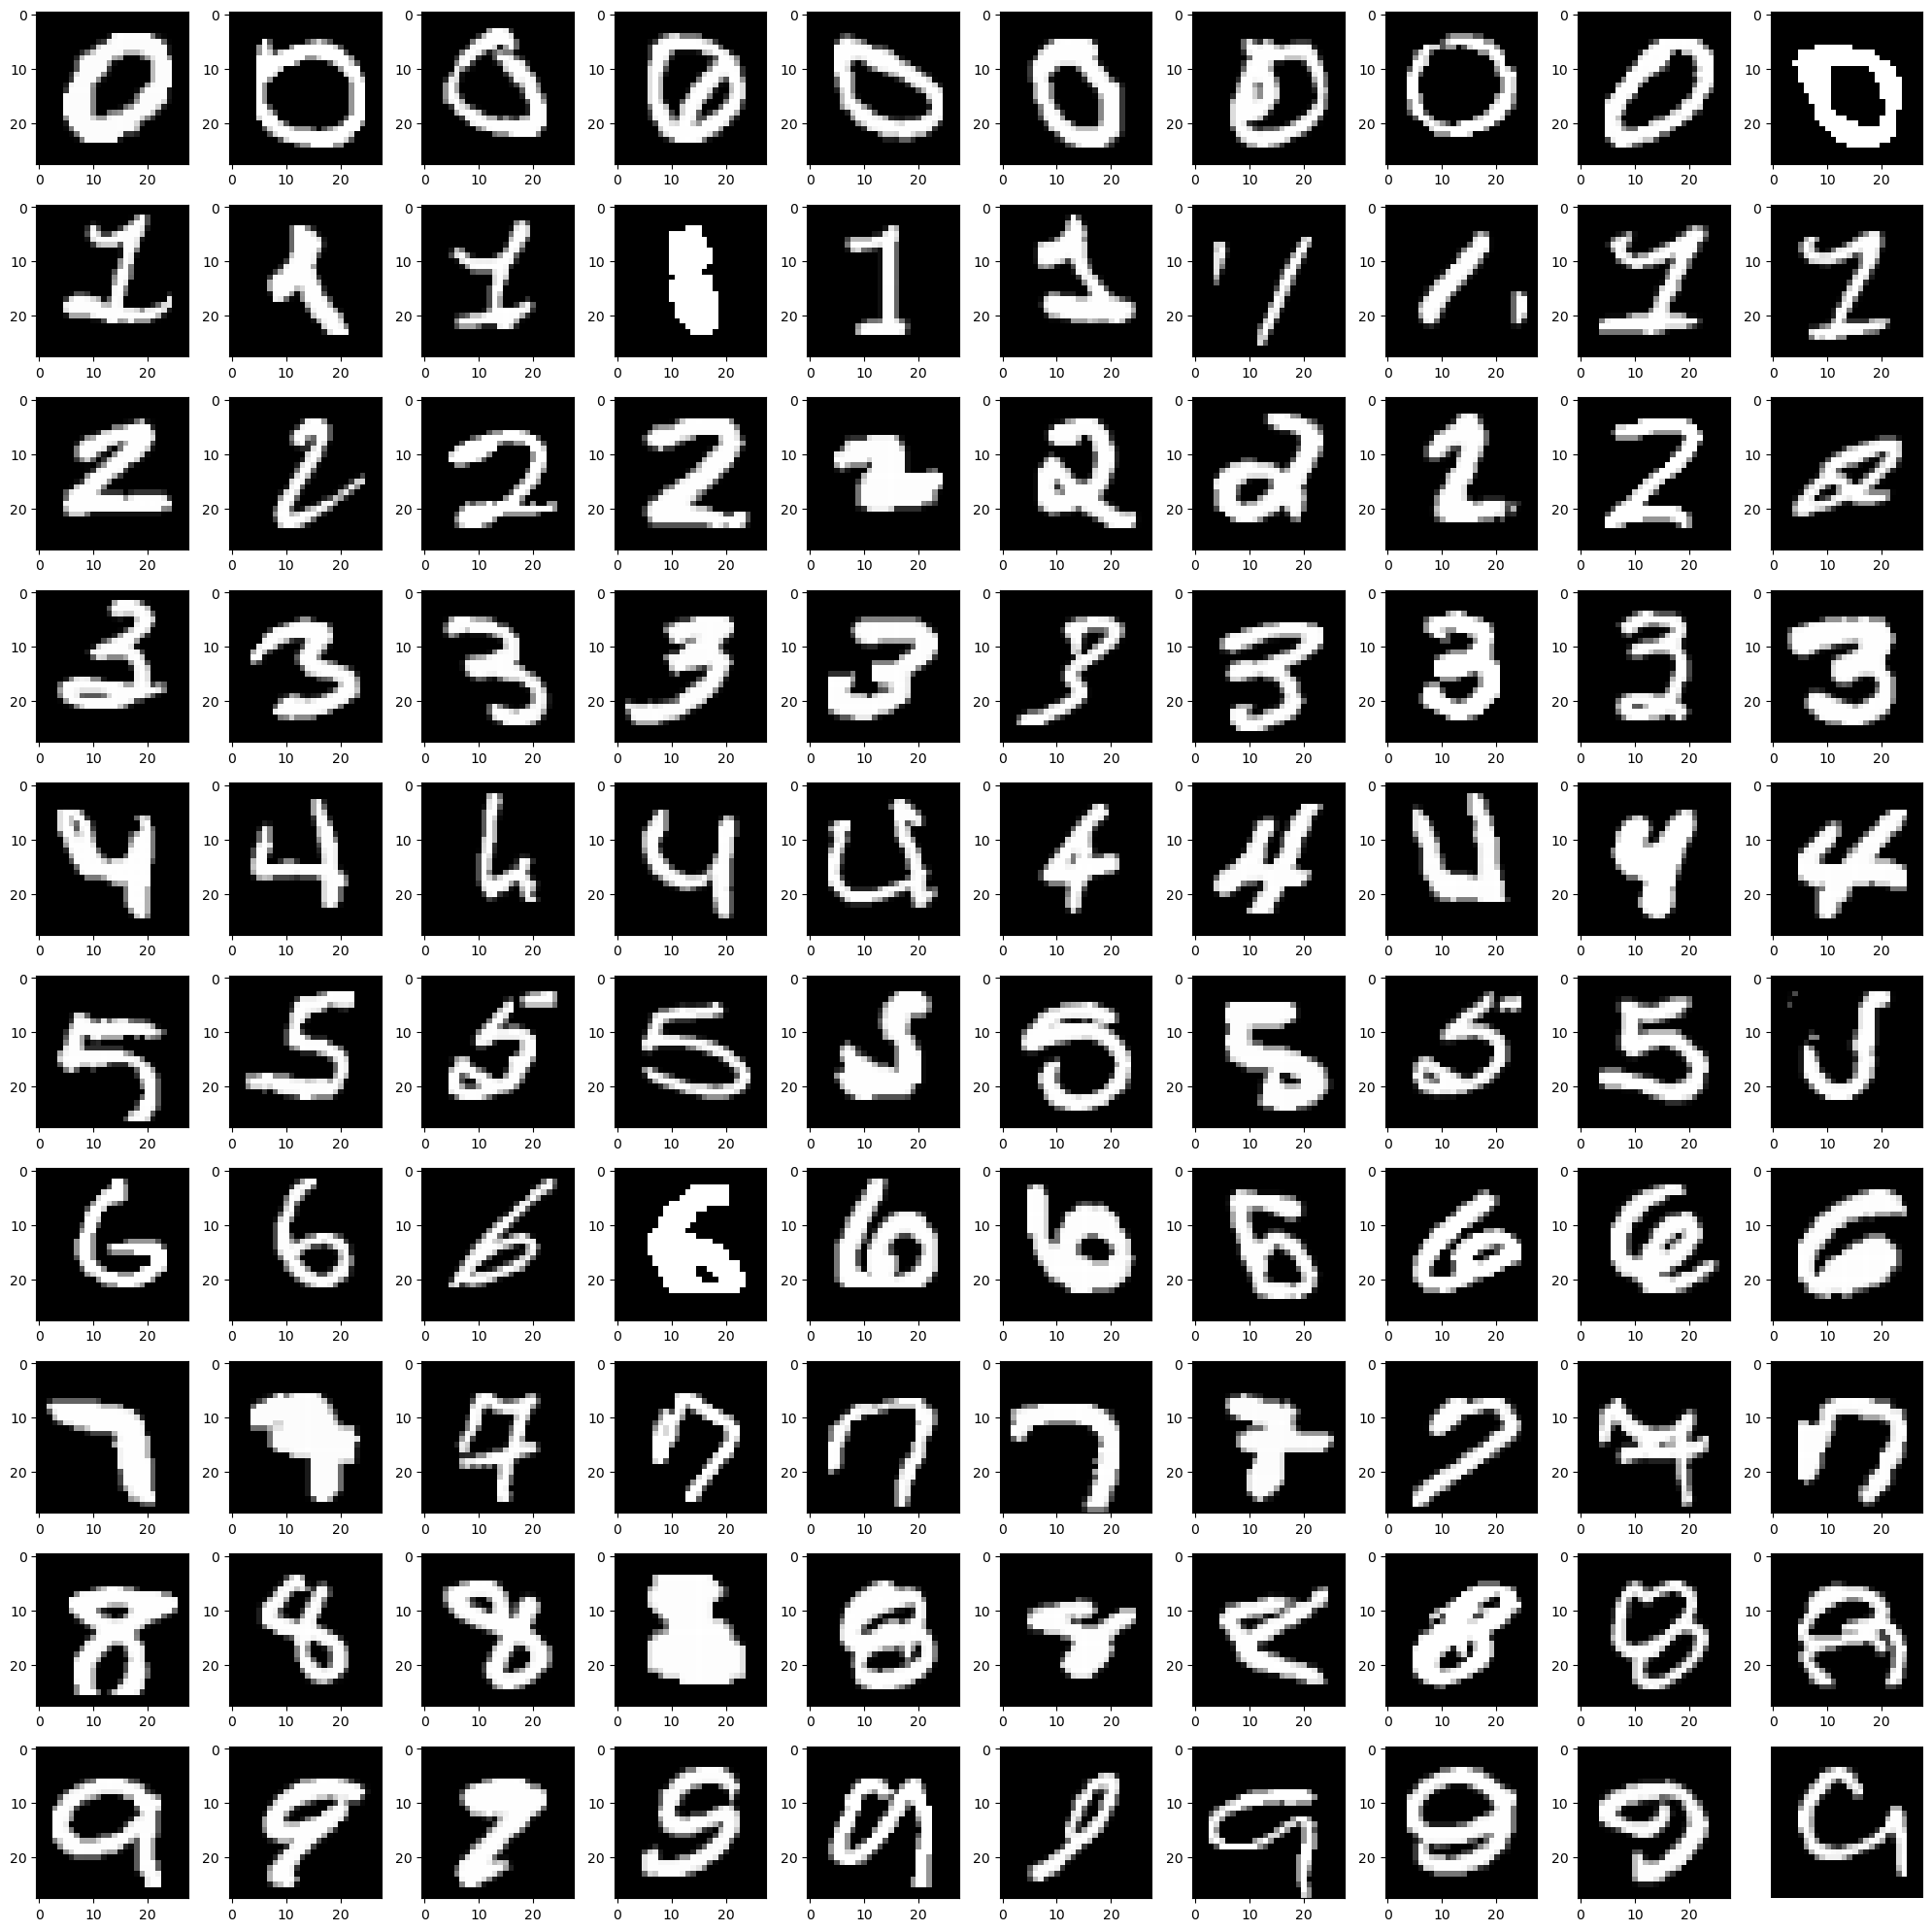

In [5]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20,20))
for i in range(10):
    salient_image = SalientPt_Dict[i]
    salient_freq = Freq_Dict[i]
    ind = np.argpartition(salient_freq, -10)[-10:] #get the 10 largest frequency index
    # ind = np.argpartition(salient_freq, 10)[:10] #get the 10 smallest frequency index
    for j in range(10):
        ax[i,j].imshow(salient_image[ind[j],:].reshape((28,28)),cmap='Greys_r')
        plt.axis('off')
fig.tight_layout()